# Task 1: Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
    Write these insights in short point-wise sentences (maximum 100 words per insight).

## Deliverables:
● A Jupyter Notebook/Python script containing your EDA code.
● A PDF report with business insights (maximum 500 words).


## List of Tasks That been performed Here --> 
###### 1] Import Libraries 
###### 2] load The data sets 
###### 3] Understand Data 
###### 4] Data Cleaning
###### 5] Join/Merged Tables 
###### 6] Performed EDA 

In [1]:
# 1] Import Libraries
# Import Required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2] load The data sets
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Let's see how our data exactly look 
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [3]:
#3] Understand Data
#Understanding data 
print("Customers dataset:\n", customers.shape)
print("products dataset:\n", products.shape)
print("Transactions dataset:\n", transactions.shape)

customers.info()
products.info()
transactions.info()

Customers dataset:
 (200, 4)
products dataset:
 (100, 4)
Transactions dataset:
 (1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #

In [4]:
#4] Data Cleaning
# Checking if there are any missing values 
print("Customers dataset:\n", customers.isnull().sum())
print("Products dataset:\n", products.isnull().sum())
print("Transactions dataset:\n", transactions.isnull().sum())

# Droping duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Converting data type --> date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


Customers dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
#5] Join/Merged Tables
# Merging tables 
merged_data = pd.merge(transactions, products, on='ProductID')

# as we have merged ransaction and product table now join it with customers table 
merged_data = pd.merge(merged_data, customers, on='CustomerID')

print("Merged Dataset:")
merged_data.head()

Merged Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [6]:
#6] Performed EDA

C:\Users\DELL\AppData\Local\Temp\ipykernel_3948\4104598851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="mako")


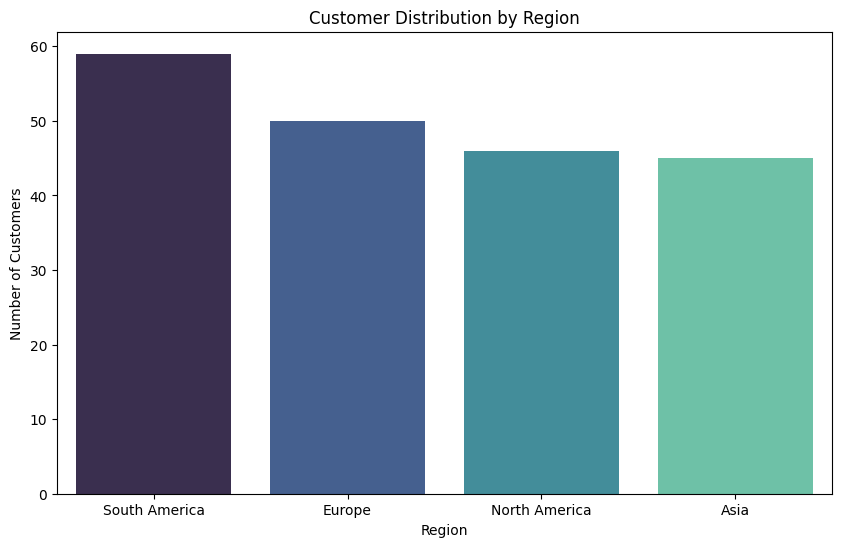

In [7]:
# customer distribution by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="mako")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3948\2402405102.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")


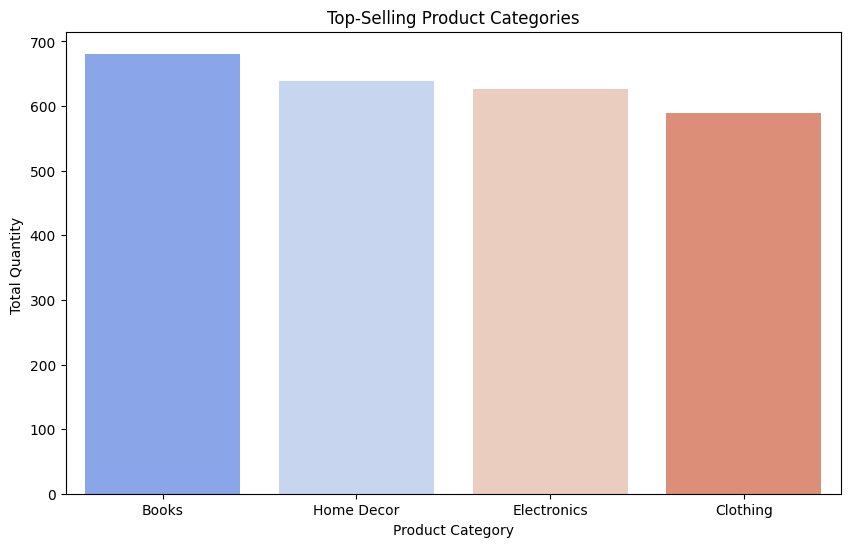

In [8]:
# Top-selling product categories
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")
plt.title("Top-Selling Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity ")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3948\788999215.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="cividis")


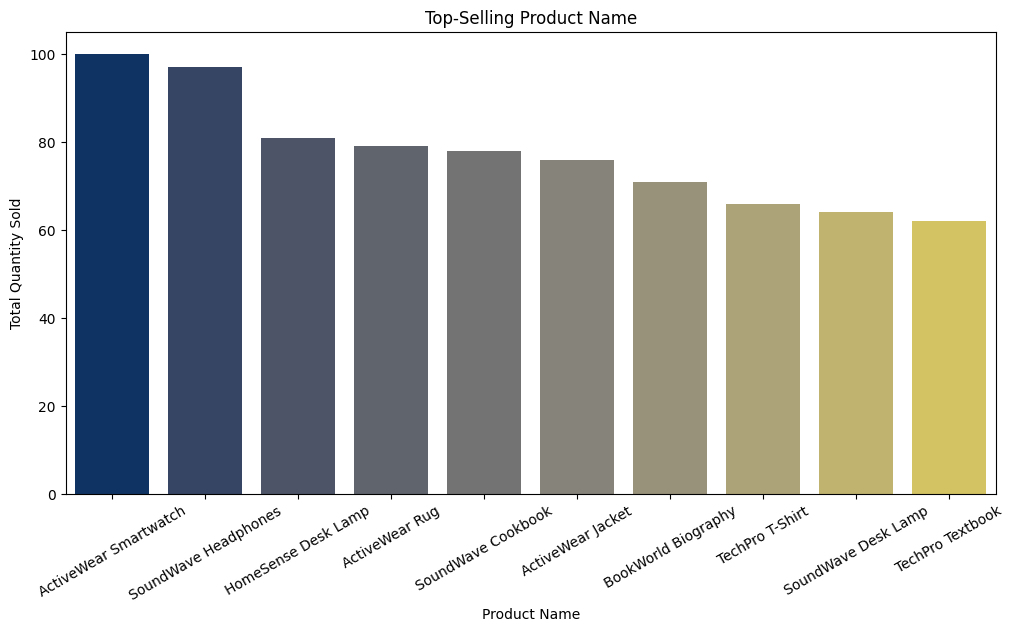

In [25]:
# Top-selling products Name by Quantity count 
category_sales = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="cividis")
plt.title("Top-Selling Product Name")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=30)
plt.show()

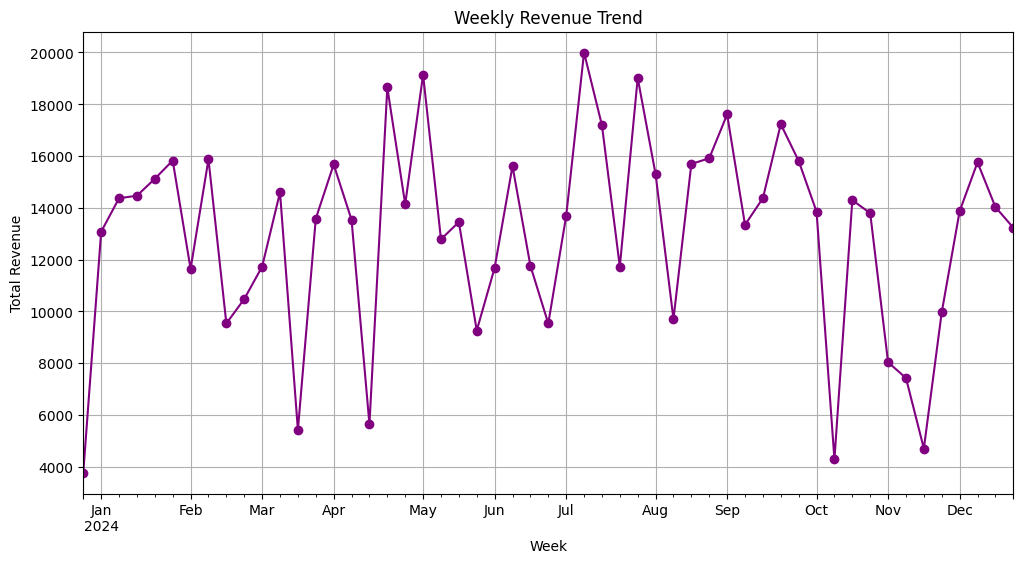

In [10]:
# Revenue trends over time (Weekly)
# Revenue over the week 
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])  
revenue_trend_weekly = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('W'))['TotalValue'].sum()
revenue_trend_weekly.index = revenue_trend_weekly.index.to_timestamp()  
plt.figure(figsize=(12, 6))
revenue_trend_weekly.plot(kind='line', marker='o', color='purple')
plt.title("Weekly Revenue Trend")
plt.xlabel("Week")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

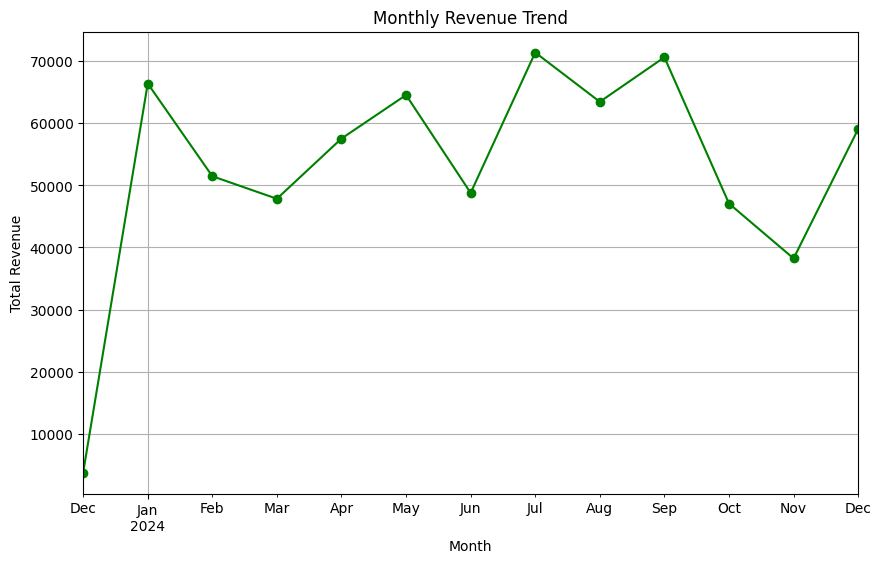

In [11]:
# Revenue trends over time (Monthly)
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
revenue_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
revenue_trend.index = revenue_trend.index.to_timestamp()

plt.figure(figsize=(10, 6))
revenue_trend.plot(kind='line', marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3948\2766910133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette="Greens_r")


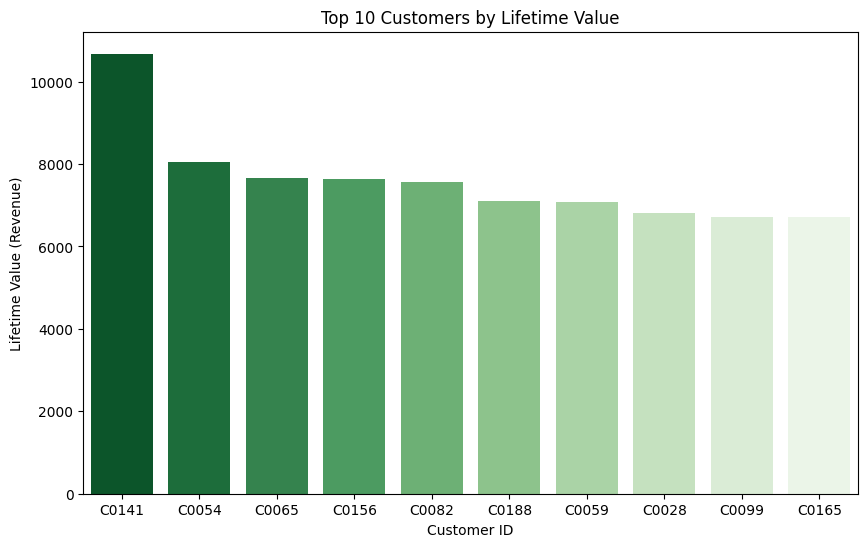

In [18]:
# Customer With longest Time support/ value 
customer_value = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_customers = customer_value.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="Greens_r")
plt.title("Top 10 Customers by Lifetime Value")
plt.xlabel("Customer ID")
plt.ylabel("Lifetime Value (Revenue)")
plt.show()

In [19]:
top_products = category_sales.index
merged_data[merged_data['ProductName'].isin(top_products)][['ProductName', 'Category']].drop_duplicates()

,ProductName,Category
37,TechPro Textbook,Books
83,BookWorld Biography,Books
135,SoundWave Cookbook,Books
210,HomeSense Desk Lamp,Home Decor
346,ActiveWear Smartwatch,Electronics
380,SoundWave Headphones,Electronics
491,SoundWave Desk Lamp,Home Decor
670,ActiveWear Rug,Home Decor
752,TechPro T-Shirt,Clothing
760,ActiveWear Jacket,Clothing


In [20]:
# Category-level revenue
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Product-level revenue
product_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Display both
print("Category Revenue:\n", category_revenue)
print("\nProduct Revenue:\n", product_revenue)


Category Revenue:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

Product Revenue:
 ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64
